Data Science project- Customer segmentation

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing dataset of mall customers given
cusdata= pd.read_csv('Mall_Customers.csv')
cusdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
cusdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


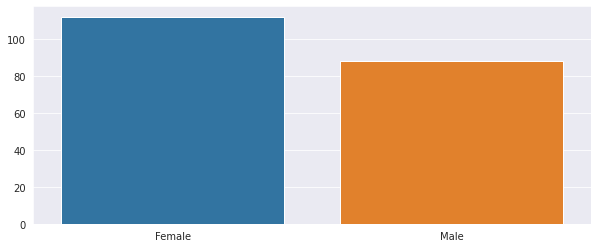

In [ ]:
genders =cusdata.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

It can be visualised from the above barplot that the number of female customers are more than that of male customers

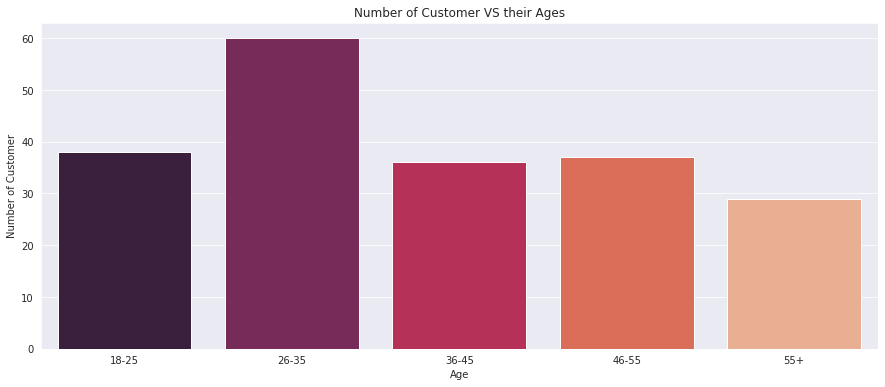

In [ ]:
age18_25 = cusdata.Age[(cusdata.Age <= 25) & (cusdata.Age >= 18)]
age26_35 = cusdata.Age[(cusdata.Age <= 35) & (cusdata.Age >= 26)]
age36_45 = cusdata.Age[(cusdata.Age <= 45) & (cusdata.Age >= 36)]
age46_55 = cusdata.Age[(cusdata.Age <= 55) & (cusdata.Age >= 46)]
age55above = cusdata.Age[cusdata.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customers VS Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

The number of customers aged 26-35 are more in number when compared to the customers of other age-groups.

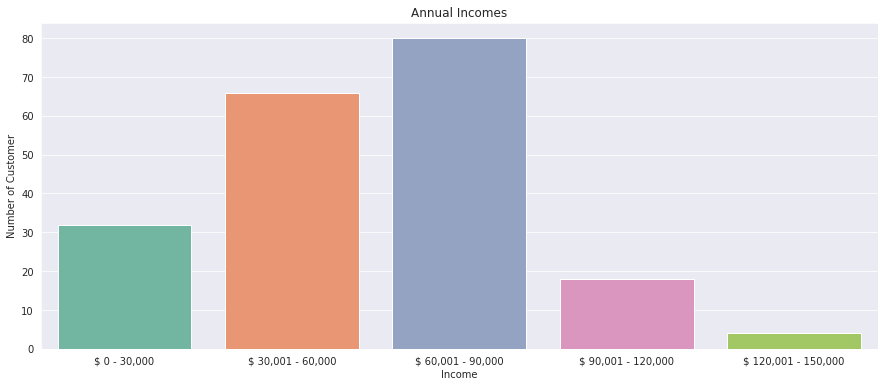

In [ ]:
ai0_30 = cusdata["Annual Income (k$)"][(cusdata["Annual Income (k$)"] >= 0) & (cusdata["Annual Income (k$)"] <= 30)]
ai31_60 = cusdata["Annual Income (k$)"][(cusdata["Annual Income (k$)"] >= 31) & (cusdata["Annual Income (k$)"] <= 60)]
ai61_90 = cusdata["Annual Income (k$)"][(cusdata["Annual Income (k$)"] >= 61) & (cusdata["Annual Income (k$)"] <= 90)]
ai91_120 =cusdata["Annual Income (k$)"][(cusdata["Annual Income (k$)"] >= 91) & (cusdata["Annual Income (k$)"] <= 120)]
ai121_150 =cusdata["Annual Income (k$)"][(cusdata["Annual Income (k$)"] >= 121) & (cusdata["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


**To analyze the customers annual incomes and spending scores. **

In [4]:
#using elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss=[]

In [5]:
#Select the annual income and the spending score columns  
X=cusdata.iloc[:, [3,4]].values

In [6]:
for i in range(1,11): 
  kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

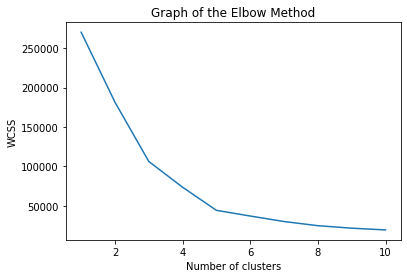

In [7]:
plt.plot(range(1,11),wcss)
plt.title('Graph of the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph , we get to know that the number of clusters to be considered is 5.

In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)


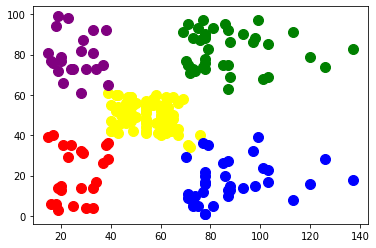

In [ ]:
#visualizing the clusters obtained
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='yellow', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='purple', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='red', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='blue', label ='Cluster 5')


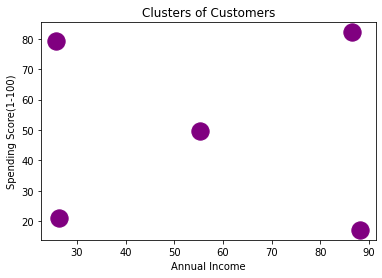

In [ ]:
#plotting the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='purple', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.show()